In [ ]:
import requests  # Python library to send HTTP requests.

url = "https://www.iisermohali.ac.in/"
#url= "https://timesofindia.indiatimes.com/"

response = requests.get(url)

# Check if request succeeded
if response.status_code == 200:
    html_content = response.text  # This is the raw HTML
    print("Successfully fetched the webpage!")
else:
    print("Failed to fetch the webpage. Status code:", response.status_code)


Successfully fetched the webpage!


In [4]:
from bs4 import BeautifulSoup

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')
# html
# ├── head
# │   └── title → 'IISER Mohali'
# └── body
#     ├── h1 → 'Welcome to IISER Mohali'
#     ├── p  → 'Indian Institute...'
#     └── p  → 'Established by...'
# We are assuming that all text content is within these tags.
# This is a very basic assumption and may not work for all websites.
# Best way to check is to inspect the website and see where the text lies.
# Extract text from common tags
valid_tags = ['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'li'] # valid tags only from the html file, h->heading, p->paragraph, li->list
text = " ".join([element.get_text() for element in soup.find_all(valid_tags)]) # join the entire string into one.

print(text[:])  # print characters


 IISER MOHALI Institute Academics Research People Outreach 79th Independence Day Celebration at IISER Mohali International Yoga Day Celebration at IISER Mohali IISER Mohali awarded degrees to 316 Graduating Students IISER Mohali Science Festival - Inaugurated by Hon'ble Education Minister of Punjab Science demonstrations & competitions The Hon'ble Vice-President of India interacts with IISER Mohali Faculty, Students & Staff Visit of Hon'ble Vice-President of India to IISER Mohali Tattva 2025 Science Fest - Celebrating the essence of Scientific Curiosity  76th Republic Day Celebration at IISER Mohali 500+ School students at IISER Mohali for National Space Day Annual Science Festival Lectures by Dr. Anjan Ray & Dr. Srivari Chandrashekhar Students awarded for outstanding performance in Academics & Sports FACULTY ACHIEVEMENTS PROFESSOR ANIL KUMAR TRIPATHI Director, IISER Mohali Elected as Vice President (Science Promotion) of INSA  1800 school students across tricity visited IISER Mohali  

Now after getting the 'text' part , our next step is to clean the text we get after parsing.
This includes getting rid of symbols , punctuations and numbers and converting all the text to lower case, so that we can standardize the text for word frequency analysis . 


In [ ]:
import re

def clean(text:str) -> str:

   text = text.lower() #convert text to lower case

   text =re.sub(r'[^a-z\s]', ' ',text)

   text = re.sub(r'\b(?![ai]\b)[a-z]\b',' ',text)

   text = re.sub(r'\s+',' ',text).strip()

   return text

clean(text)

cleaned_text = clean(text)


##### Now we will break the string into single words and count the frequencies.
##### That is, tokenize, count and store.

In [ ]:
from collections import Counter

def count_words(cleaned_text: str) -> Counter:
    """
    Takes a cleaned text string (only lowercase letters and spaces),
    returns a Counter mapping word -> frequency.
    """

    words = cleaned_text.split() # splits the cleaned string over white spaces

    word_counter = Counter(words) # gets frequency of words   

    return word_counter

Counted_words = count_words(cleaned_text)
most_used = Counted_words.most_common(20)

print("Top 10 most used words:")
for word,freq in most_used:
    print(f"{word:>12} : {freq}")


Top 10 most used words:
       iiser : 15
      mohali : 14
          of : 8
     science : 6
    sciences : 6
   committee : 6
    research : 5
         day : 5
    students : 5
   institute : 4
          at : 4
     faculty : 4
        news : 4
   academics : 3
 celebration : 3
          by : 3
         hon : 3
         ble : 3
         the : 3
        vice : 3


Now, we need to store data. It is database where we can query, filter and join across multiple sites later.

CSV is static: you can only store and read rows.
SQLite is dynamic: you can query — “show words used more than 50 times,” or “compare IISER Mohali vs Pune.”

In [ ]:
import sqlite3

def store_sqlite(word_counts: Counter, db_path='words.db', table='word_frequency'):
    # word_counts: Counter — our counted data from earlier (Counter is like a dict: {word: freq}).
    # db_path='words.db' — the name of the database file.
    # table='word_frequency' — the name of the SQL table to store data in.

    # Connect to the database 
    conn = sqlite3.connect(db_path) # Opens (or creates) a database file. conn is the returned object here -> active connection to that database.
    cur = conn.cursor() # Gives you a cursor, which is like a “pen” used to execute SQL commands.
    #SQL databases work transactionally — you make changes through a cursor, then commit them all at once.

    # Create table
    cur.execute(f"""
        CREATE TABLE IF NOT EXISTS {table} (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            word TEXT UNIQUE,
            frequency INTEGER
        )
    """)
        # id INTEGER PRIMARY KEY AUTOINCREMENT → auto numbering for each row.
        # word TEXT UNIQUE → ensures no duplicates (each word appears once).
        # frequency INTEGER → stores how often the word appears.
        # SQL needs data types. TEXT for words, INTEGER for counts.

    # updating the table, putting values in it.
    for i , freq in word_counts.items(): # loop over all wordandfreqency pairs
        cur.execute(f"""
            INSERT INTO {table} (word , frequency)
            VALUES (? , ?)
            ON CONFLICT(word) DO UPDATE SET frequency = excluded.frequency
        """, (i,freq))
        # executing againusing the cursor, 
        # INSERT INTO {table} (word , frequency) VALUES (? , ?) ---->>>> adds a new row
        # ? -> replaced by (i, freq), 
        # ON CONFLICT(word) DO UPDATE --->>> if same word then update earlier thing.

    ## save the changes.
    conn.commit() # permanently writes all pending changes to disk.
    conn.close() # ends the database session freeign the used resources.


In [ ]:
## now to read the stored data back, we proceed as.

def read_sql(db_path='words.db', table='word_frequency', top=20):
    conn = sqlite3.connect(db_path)
    cur = conn.cursor()
    cur.execute(f"SELECT word , frequency FROM {table} ORDER BY frequency DESC LIMIT ?", (top,))
    rows = cur.fetchall()
    conn.close
    return rows  

## It do as:
# SELECT word, frequency
# FROM word_frequency
# ORDER BY frequency DESC
# LIMIT top = 20;  

In [ ]:
store_sqlite(Counted_words)
TOP_20 = read_sql()
for w, f in TOP_20:
    print(f"{w:>12}  {f}")

       iiser  15
      mohali  14
          of  8
     science  6
    sciences  6
   committee  6
    research  5
         day  5
    students  5
   institute  4
          at  4
     faculty  4
        news  4
   academics  3
 celebration  3
          by  3
         hon  3
         ble  3
         the  3
        vice  3


#### Now we sqlite3 DB, we need to store multiple sites data into it, iteratively or seperately.

In [1]:
# Complete end-to-end: scrape -> clean -> count -> store -> compare
# Requirements: requests, beautifulsoup4
# Run: pip install requests beautifulsoup4  (if not installed)

import requests
from bs4 import BeautifulSoup
import re
import sqlite3
from collections import Counter
from typing import List, Tuple

# -------------------------
# Scrape + clean functions
# -------------------------
def clean_text(text: str) -> str:
    """
    Convert to lowercase, remove non-letters except spaces,
    remove stray single letters except 'a' and 'i', normalize whitespace.
    """
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)               # keep only a-z and whitespace
    text = re.sub(r'\b(?![ai]\b)[a-z]\b', ' ', text)    # remove single letters except 'a' and 'i'
    text = re.sub(r'\s+', ' ', text).strip()            # collapse spaces
    return text

def scrape_text_from_url(url: str, valid_tags=None, timeout=12) -> str:
    """
    Fetch URL, parse HTML, extract text from valid_tags, then clean it.
    Returns cleaned text string.
    """
    if valid_tags is None:
        valid_tags = ['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'li']

    response = requests.get(url, timeout=timeout)
    if response.status_code != 200:
        raise RuntimeError(f"Failed to fetch {url} (status {response.status_code})")
    soup = BeautifulSoup(response.text, 'html.parser')
    pieces = [el.get_text(separator=' ', strip=True) for el in soup.find_all(valid_tags)]
    raw_text = " ".join(pieces)
    return clean_text(raw_text)

# -------------------------
# Counting function
# -------------------------
def count_words(cleaned_text: str) -> Counter:
    words = cleaned_text.split()
    return Counter(words)

# -------------------------
# SQLite storage functions (single table for all sites)
# -------------------------
def store_site_word_counts(
    word_counts: Counter,
    site: str,
    db_path: str = "words.db",
    table: str = "word_frequency",
    accumulate: bool = True
) -> None:
    """
    Store counts for a given site into SQLite.
    - accumulate=True : add new counts to existing (useful for incremental scraping)
    - accumulate=False: replace stored counts for that site (snapshot)
    """
    conn = sqlite3.connect(db_path)
    cur = conn.cursor()

    # Create table holding rows for many sites (site, word, frequency)
    cur.execute(f"""
        CREATE TABLE IF NOT EXISTS {table} (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            site TEXT NOT NULL,
            word TEXT NOT NULL,
            frequency INTEGER NOT NULL,
            UNIQUE(site, word)
        )
    """)

    if accumulate:
        # add new counts to existing frequency
        upsert_sql = f"""
            INSERT INTO {table} (site, word, frequency)
            VALUES (?, ?, ?)
            ON CONFLICT(site, word) DO UPDATE
              SET frequency = {table}.frequency + excluded.frequency
        """
    else:
        # replace stored frequency with the new one
        upsert_sql = f"""
            INSERT INTO {table} (site, word, frequency)
            VALUES (?, ?, ?)
            ON CONFLICT(site, word) DO UPDATE
              SET frequency = excluded.frequency
        """

    for w, freq in word_counts.items():
        cur.execute(upsert_sql, (site, w, int(freq)))

    conn.commit()
    conn.close()

def read_top_by_site(
    site: str,
    db_path: str = "words.db",
    table: str = "word_frequency",
    top: int = 20
) -> List[Tuple[str, int]]:
    conn = sqlite3.connect(db_path)
    cur = conn.cursor()
    cur.execute(f"SELECT word, frequency FROM {table} WHERE site = ? ORDER BY frequency DESC LIMIT ?", (site, top))
    rows = cur.fetchall()
    conn.close()
    return rows

def compare_sites_common(
    site1: str,
    site2: str,
    db_path: str = "words.db",
    table: str = "word_frequency",
    top: int = 30,
    sort_by: str = "sum"  # "sum" | "min" | "diff"
) -> List[Tuple[str, int, int]]:
    """
    Return common words between site1 and site2 as (word, freq_site1, freq_site2).
    sort_by:
      - 'sum' : sort by freq1+freq2 descending (default)
      - 'min' : sort by min(freq1,freq2) descending -> words both strongly used
      - 'diff': sort by absolute difference descending -> most differently-used words
    """
    conn = sqlite3.connect(db_path)
    cur = conn.cursor()
    sql = f"""
        SELECT a.word, a.frequency AS f1, b.frequency AS f2
        FROM {table} a
        JOIN {table} b ON a.word = b.word
        WHERE a.site = ? AND b.site = ?
    """
    cur.execute(sql, (site1, site2))
    rows = cur.fetchall()
    conn.close()

    if sort_by == "sum":
        rows_sorted = sorted(rows, key=lambda r: (r[1] + r[2]), reverse=True)
    elif sort_by == "min":
        rows_sorted = sorted(rows, key=lambda r: min(r[1], r[2]), reverse=True)
    elif sort_by == "diff":
        rows_sorted = sorted(rows, key=lambda r: abs(r[1] - r[2]), reverse=True)
    else:
        rows_sorted = rows

    return rows_sorted[:top]

def unique_to_site(
    site1: str,
    site2: str,
    db_path: str = "words.db",
    table: str = "word_frequency",
    top: int = 50
) -> List[Tuple[str, int]]:
    """
    Words present in site1 but NOT in site2 (ordered by frequency in site1).
    """
    conn = sqlite3.connect(db_path)
    cur = conn.cursor()
    sql = f"""
        SELECT a.word, a.frequency
        FROM {table} a
        LEFT JOIN {table} b ON a.word = b.word AND b.site = ?
        WHERE a.site = ? AND b.word IS NULL
        ORDER BY a.frequency DESC
        LIMIT ?
    """
    cur.execute(sql, (site2, site1, top))
    rows = cur.fetchall()
    conn.close()
    return rows

# -------------------------
# Example end-to-end usage
# -------------------------
if __name__ == "__main__":
    # Example 1: single site (IISER Mohali)
    mohali_url = "https://www.iisermohali.ac.in/"
    print("Scraping:", mohali_url)
    cleaned_mohali_text = scrape_text_from_url(mohali_url)
    word_counts_mohali = count_words(cleaned_mohali_text)
    print("Unique words (Mohali):", len(word_counts_mohali))
    print("Top 10 (Mohali):", word_counts_mohali.most_common(10))

    # Store in DB (accumulate=True => add counts if site already present)
    store_site_word_counts(word_counts_mohali, site=mohali_url, accumulate=True)
    print("Stored Mohali counts in DB.")

    # Example 2: another site (IISER Pune) - optional
    pune_url = "https://www.iiserpune.ac.in/"
    print("\nScraping:", pune_url)
    cleaned_pune_text = scrape_text_from_url(pune_url)
    word_counts_pune = count_words(cleaned_pune_text)
    store_site_word_counts(word_counts_pune, site=pune_url, accumulate=True)
    print("Stored Pune counts in DB.")

    # Read and display top words for each site
    print("\nTop words - Mohali:")
    for w, f in read_top_by_site(mohali_url, top=20):
        print(f"{w:>15}  {f}")
    print("\nTop words - Pune:")
    for w, f in read_top_by_site(pune_url, top=20):
        print(f"{w:>15}  {f}")

    # Compare common words
    print("\nTop common words (by sum of frequencies):")
    for word, f1, f2 in compare_sites_common(mohali_url, pune_url, top=25, sort_by="sum"):
        print(f"{word:>15}  Mohali:{f1:5d}  Pune:{f2:5d}")

    # Words unique to Mohali (not in Pune)
    print("\nTop words unique to Mohali (not in Pune):")
    for w, f in unique_to_site(mohali_url, pune_url, top=30):
        print(f"{w:>15}  {f}")


Scraping: https://www.iisermohali.ac.in/
Unique words (Mohali): 212
Top 10 (Mohali): [('iiser', 15), ('mohali', 14), ('of', 8), ('science', 6), ('sciences', 6), ('committee', 6), ('research', 5), ('day', 5), ('students', 5), ('institute', 4)]
Stored Mohali counts in DB.

Scraping: https://www.iiserpune.ac.in/
Stored Pune counts in DB.

Top words - Mohali:
          iiser  15
         mohali  14
             of  8
      committee  6
        science  6
       sciences  6
            day  5
       research  5
       students  5
             at  4
        faculty  4
      institute  4
           news  4
      academics  3
            ble  3
             by  3
       calendar  3
    celebration  3
     committees  3
         events  3

Top words - Pune:
            and  36
            the  22
             in  20
             of  17
          iiser  15
           pune  15
       research  15
         events  11
             on  11
         campus  10
        faculty  10
             at  9
  

Top 30 (from DB): [('iiser', 15), ('mohali', 14), ('of', 8), ('committee', 6), ('science', 6), ('sciences', 6), ('day', 5), ('research', 5), ('students', 5), ('at', 4)]


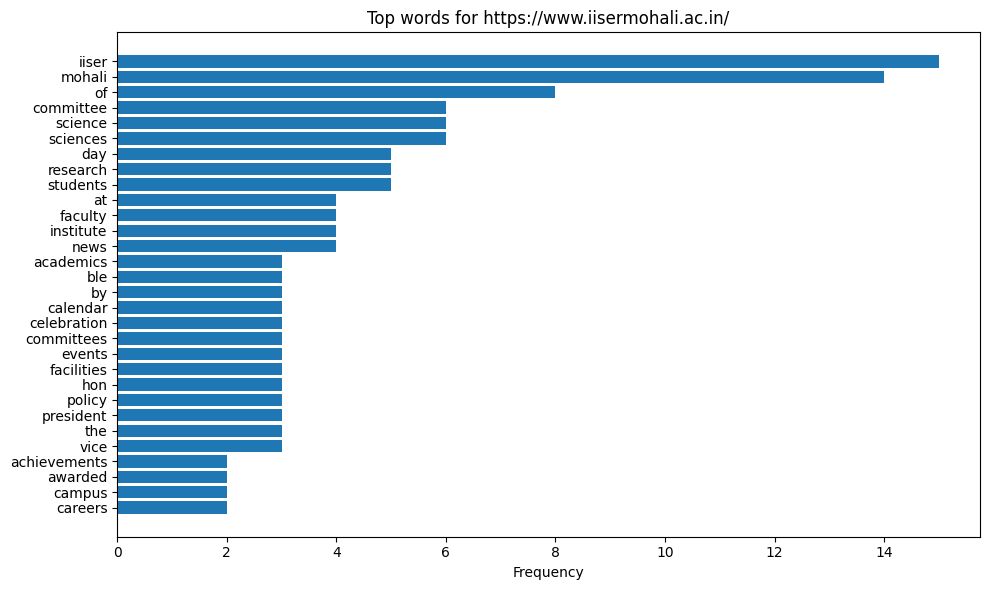

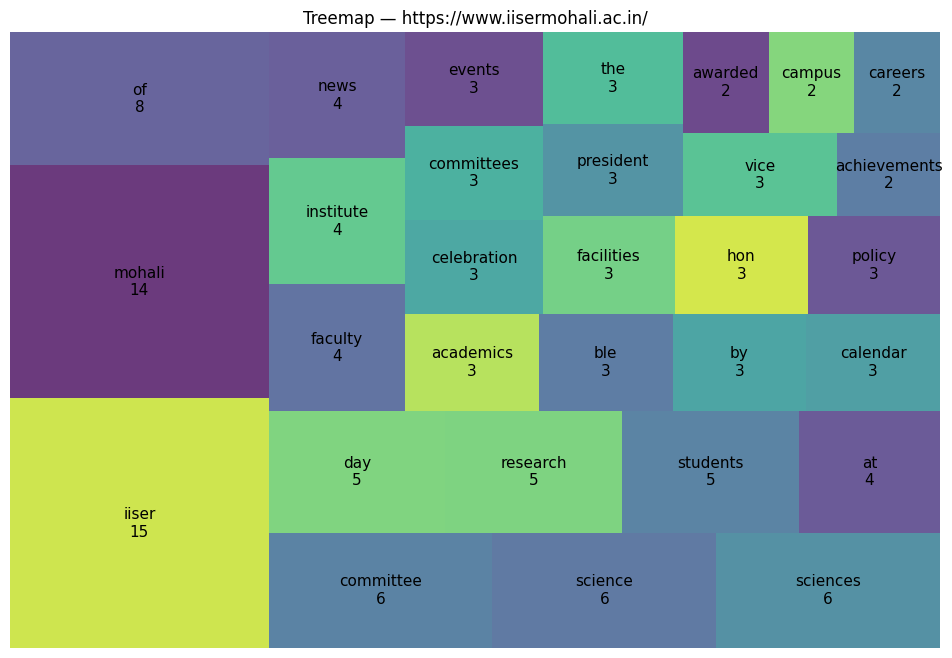

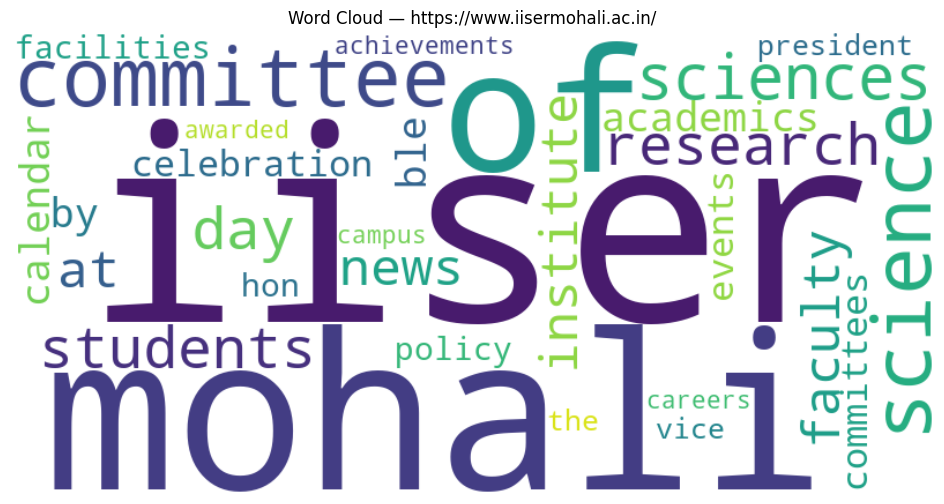

In [1]:
# Visualization: bar chart, treemap, optional wordcloud
import sqlite3
import matplotlib.pyplot as plt
import squarify             # pip install squarify
from wordcloud import WordCloud   # pip install wordcloud (optional)
from typing import List, Tuple

# --- helper: fetch top N words from DB for a site
def fetch_top_from_db(site: str, db_path='words.db', table='word_frequency', top=30) -> List[Tuple[str,int]]:
    conn = sqlite3.connect(db_path)
    cur = conn.cursor()
    cur.execute(f"SELECT word, frequency FROM {table} WHERE site = ? ORDER BY frequency DESC LIMIT ?", (site, top))
    rows = cur.fetchall()
    conn.close()
    return rows

# --- plotting functions
def plot_bar_top(words_freq: List[Tuple[str,int]], title="Top words", figsize=(10,6)):
    words, freqs = zip(*words_freq)
    # reverse for horizontal bar chart (largest at top)
    words = list(words)[::-1]
    freqs = list(freqs)[::-1]
    plt.figure(figsize=figsize)
    plt.barh(words, freqs)
    plt.xlabel("Frequency")
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_treemap(words_freq: List[Tuple[str,int]], title="Treemap of word frequencies", figsize=(12,8)):
    words, freqs = zip(*words_freq)
    # squarify wants numeric sizes, sort descending
    sizes = list(freqs)
    labels = [f"{w}\n{f}" for w,f in words_freq]
    plt.figure(figsize=figsize)
    squarify.plot(sizes=sizes, label=labels, alpha=0.8, text_kwargs={'fontsize':11})
    plt.axis('off')
    plt.title(title)
    plt.show()

def plot_wordcloud(words_freq: List[Tuple[str,int]], title="Word Cloud"):
    # WordCloud expects a dict word->freq
    freq_dict = {w: f for w,f in words_freq}
    wc = WordCloud(width=800, height=400, background_color='white')
    wc.generate_from_frequencies(freq_dict)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# --- Example usage: replace site strings with your stored site keys (e.g. full URL)
site_mohali = "https://www.iisermohali.ac.in/"
top30 = fetch_top_from_db(site_mohali, top=30)
print("Top 30 (from DB):", top30[:10])

# Plot bar, treemap, and wordcloud
plot_bar_top(top30, title=f"Top words for {site_mohali}")
plot_treemap(top30, title=f"Treemap — {site_mohali}")
# Optional:
try:
    plot_wordcloud(top30, title=f"Word Cloud — {site_mohali}")
except Exception as e:
    print("WordCloud not available or failed:", e)


Top 30 (from DB): [('and', 36), ('the', 22), ('in', 20), ('of', 17), ('iiser', 15), ('pune', 15), ('research', 15), ('events', 11), ('on', 11), ('campus', 10)]


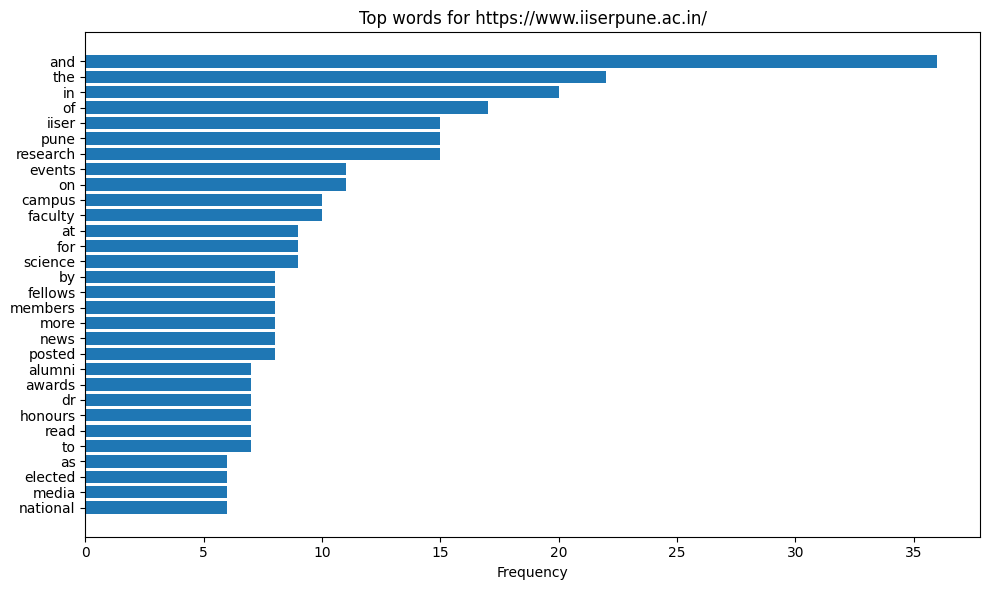

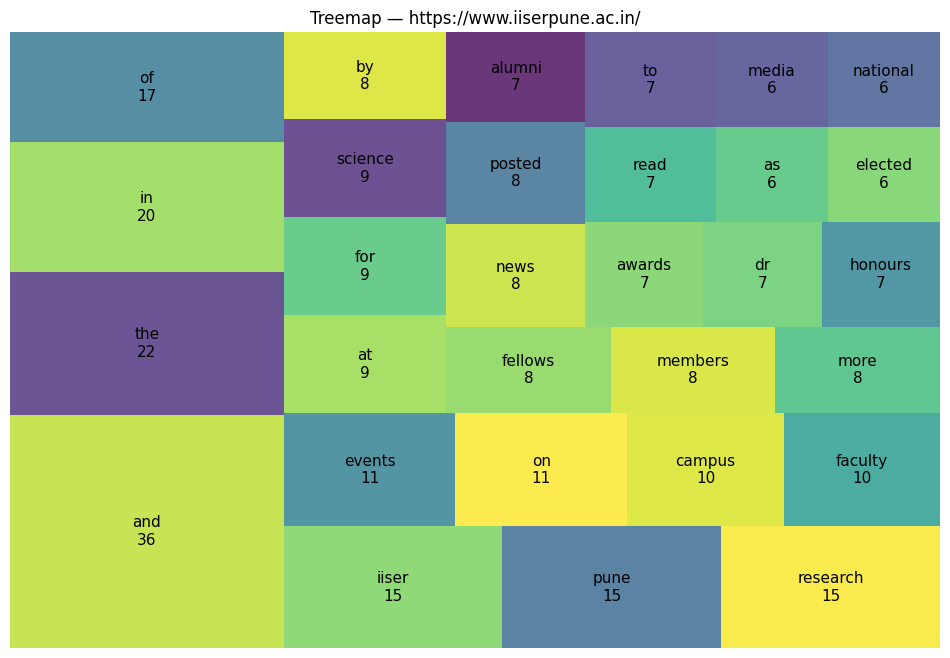

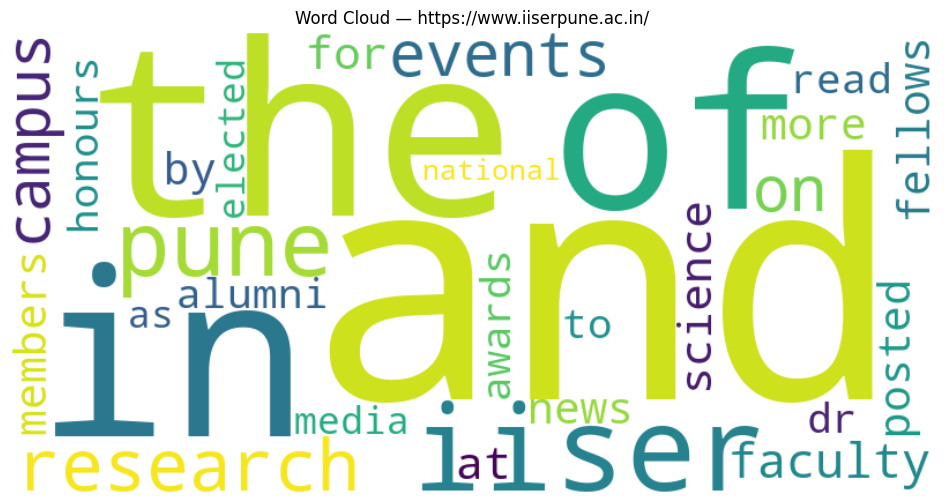

In [7]:
site_pune = "https://www.iiserpune.ac.in/"
top30 = fetch_top_from_db(site_pune, top=30)
print("Top 30 (from DB):", top30[:10])

# Plot bar, treemap, and wordcloud
plot_bar_top(top30, title=f"Top words for {site_pune}")
plot_treemap(top30, title=f"Treemap — {site_pune}")
# Optional:
try:
    plot_wordcloud(top30, title=f"Word Cloud — {site_pune}")
except Exception as e:
    print("WordCloud not available or failed:", e)